In [32]:
from underlying import Underlying
from option import Option
from trader import Trader

import matplotlib.pyplot as plt
from tqdm import tqdm

import numpy as np
import pandas as pd

In [33]:
def payoff_call(X, K):
    if len(X.shape) == 1:
        X.shape += (1,)
    return np.maximum(X[:,-1]- K, 0)
def payoff_put(X, K):
    if len(X.shape) == 1:
        X.shape += (1,)
    return np.maximum(K - X[:,-1], 0)

In [34]:
mu = 0.06
sigma =  0.1
r = 0.05
T = 1
K = 80
X0 = 100

In [35]:
underlying = Underlying(mu, sigma, r)

In [36]:
_, reality = underlying.simulate_P(100, T)

In [37]:
vanilla_call = Option(underlying, lambda X: payoff_call(X, K), T)

In [38]:
BC_price_call = vanilla_call.get_MC_price(X0, 0, method = 'var_control')
BC_price_call

23.901069057255445

In [39]:
money_time_call = np.zeros(reality.shape)
delta_time_call = np.zeros(reality.shape)
for i in tqdm(range(100)):
    trader = Trader(money = BC_price_call)
    money, delta = trader.full_hedge(vanilla_call, X0*reality[i,:], update_freq = 30)
    money_time_call[i, :] = money
    delta_time_call[i, :] = delta

100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.13it/s]


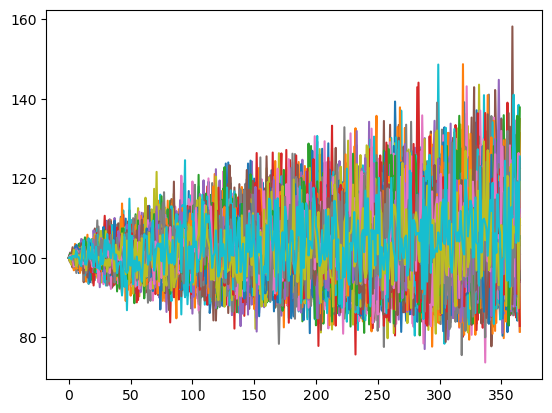

In [40]:
plt.plot(X0*reality.T)

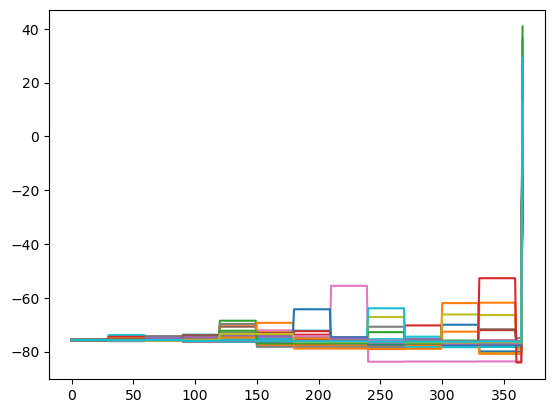

In [41]:
plt.plot(money_time_call.T)

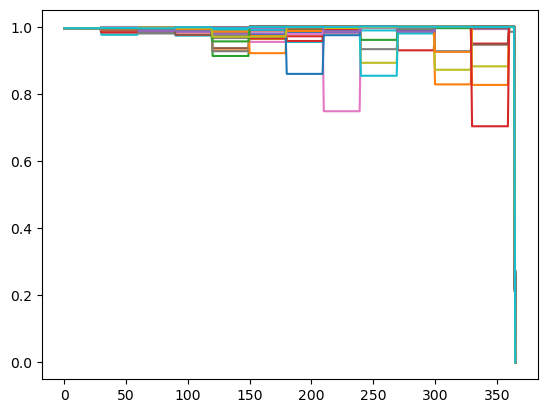

In [42]:
plt.plot(delta_time_call.T)

(array([ 3.,  3., 11., 15., 23., 24., 10.,  7.,  1.,  3.]),
 array([-19.48150952, -13.44567296,  -7.4098364 ,  -1.37399983,
          4.66183673,  10.69767329,  16.73350985,  22.76934642,
         28.80518298,  34.84101954,  40.87685611]),
 <BarContainer object of 10 artists>)

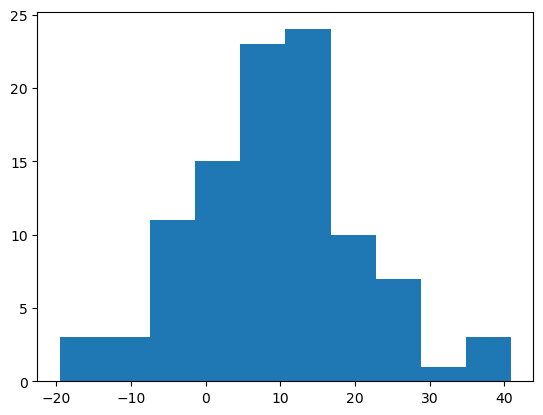

In [43]:
plt.hist(money_time_call[:,-1])